# Kernel herding examples
The aim of this notebook is to provide simple examples to apply kernel herding on multivariate random inputs with or without a dependency structure.

In [1]:
%matplotlib inline

In [2]:
import openturns as ot
import otkerneldesign as otkd
from plotools import *

In [3]:
from matplotlib import rc, rcParams, style
style.use('default')
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
rc('font', **{'family': 'Palatino'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=14)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size
#rc('figure', titlesize='xx-large')# Set the font size of the figure title

## Independent bivariate random mixture

In [4]:
# Random input variable definition
unifrom = ot.Uniform(0., 1.)
distribution = ot.ComposedDistribution([unifrom] * 2)

In [5]:
d = DrawFunctions()
def draw_candidates(candidate_sample, title='Design of experiments'):
    fig = plt.figure(figsize=(8, 8))
    plt.title(title, fontsize=20)
    plt.xlabel("$x_0$", fontsize=20)
    plt.ylabel("$x_1$", fontsize=20)
    plt.scatter(candidate_sample[:, 0], candidate_sample[:, 1], alpha=0.1, label='candidate points ($N={}$)'.format(len(candidate_sample)), color='C7')
    plt.legend(loc='best')
    return fig

In [21]:
dimension = distribution.getDimension()
size = 20
# Monte Carlo design
mc_design = distribution.getSample(size)
# Kernel definition
theta1 = 0.05
theta2 = 0.05 / 5
ker_list = [ot.MaternModel([theta1], [1.0], 2.5), ot.MaternModel([theta2], [1.0], 2.5)]
kernel = ot.ProductCovarianceModel(ker_list)
# Kernel herding design
kh = otkd.KernelHerding(
    kernel=kernel,
    #initial_design=np.array([[0.5, 0.8]]),
    candidate_set_size=2 ** 12,
    distribution=distribution
)
kh_design = kh.select_design(size)
kh_indexes = kh.get_indices(kh_design)

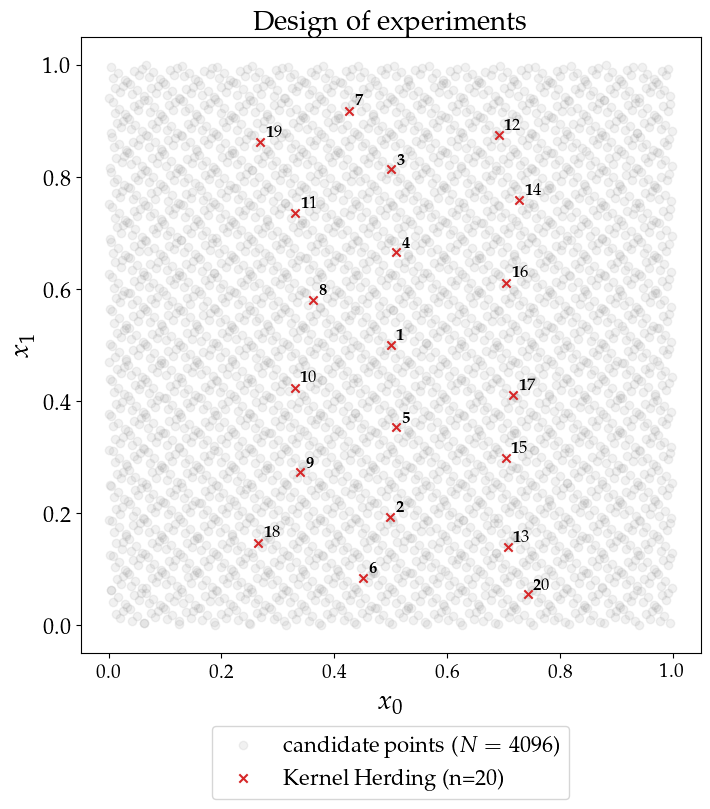

In [22]:
#fig = d.draw_2D_controur('Sampling a bivariate random mixture', None, distribution)
fig = draw_candidates(kh._candidate_set);
#plt.scatter(mc_design[:, 0], mc_design[:, 1], label='Monte Carlo (n={})'.format(size), marker='o', alpha=0.5)
plt.scatter(kh_design[:, 0], kh_design[:, 1], label='Kernel Herding (n={})'.format(size), marker='x', color='C3')


for i in range(len(kh_design)):
    plt.text(kh_design[i][0] + 0.01, kh_design[i][1] + 0.01, r"$\textbf{}$".format(i + 1), weight="bold", fontsize=12, color='k')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center');